In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

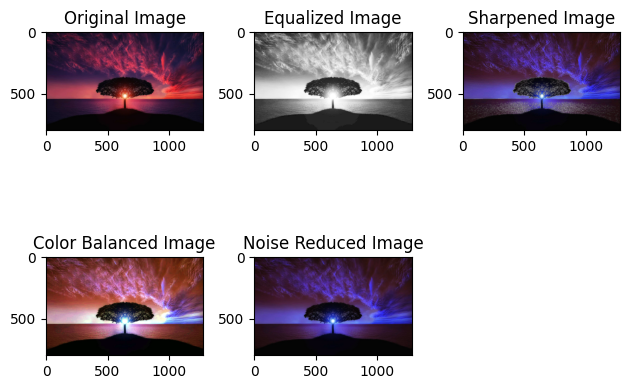

In [ ]:
#Q1
image_path = 'image.jpg'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

# Histogram Equalization
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equalized_img = cv2.equalizeHist(img_gray)

plt.subplot(2, 3, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')

# Sharpening
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened_img = cv2.filter2D(img, -1, kernel)

plt.subplot(2, 3, 3)
plt.imshow(sharpened_img)
plt.title('Sharpened Image')

# Color Balance
balanced_img = cv2.xphoto.createSimpleWB().balanceWhite(img)

plt.subplot(2, 3, 4)
plt.imshow(balanced_img)
plt.title('Color Balanced Image')

# Noise Reduction
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

plt.subplot(2, 3, 5)
plt.imshow(blurred_img)
plt.title('Noise Reduced Image')
plt.tight_layout()
plt.show()

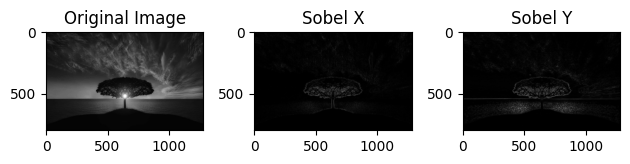

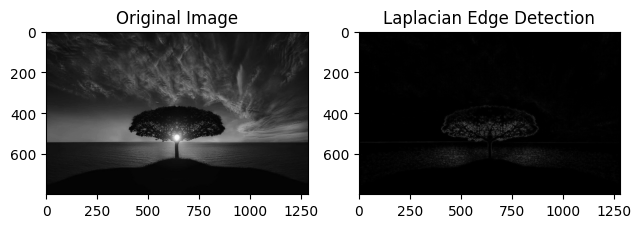

In [ ]:
#Q2
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(np.abs(sobel_x), cmap='gray') #sobel
plt.title('Sobel X')
plt.subplot(1, 3, 3)
plt.imshow(np.abs(sobel_y), cmap='gray')
plt.title('Sobel Y')

plt.tight_layout()
plt.show()
laplacian = cv2.Laplacian(img, cv2.CV_64F) #laplacian
laplacian_abs = np.abs(laplacian)
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.tight_layout()
plt.show()

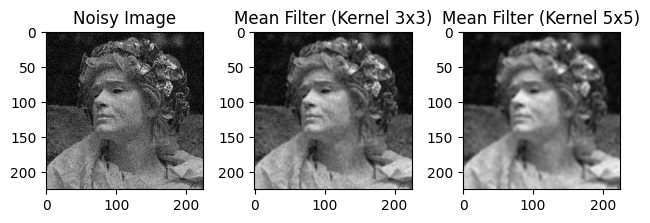

In [ ]:
#Q3
noise_image_path = 'noise.jpeg'
noise_img = cv2.imread(noise_image_path, cv2.IMREAD_GRAYSCALE) #img noise

plt.subplot(1, 3, 1)
plt.imshow(noise_img, cmap='gray')
plt.title('Noisy Image')

# Arithmetic mean filtering with size = 3
kernel_size_3 = (3, 3)
filtered_img_3 = cv2.blur(noise_img, kernel_size_3)

plt.subplot(1, 3, 2)
plt.imshow(filtered_img_3, cmap='gray')
plt.title('Mean Filter (Kernel 3x3)')

# Arithmetic mean filtering with size = 5
kernel_size_5 = (5, 5)
filtered_img_5 = cv2.blur(noise_img, kernel_size_5)
plt.subplot(1, 3, 3)
plt.imshow(filtered_img_5, cmap='gray')
plt.title('Mean Filter (Kernel 5x5)')

plt.tight_layout() #filtered img finalize
plt.show()


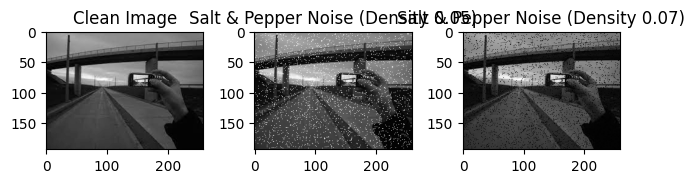

In [ ]:
#Q4
clean_image_path = 'clean.jpeg'
clean_img = cv2.imread(clean_image_path, cv2.IMREAD_GRAYSCALE) #load

plt.subplot(1, 3, 1)
plt.imshow(clean_img, cmap='gray')
plt.title('Clean Image')

#salt-and-pepper noise with density = 0.05
noise_density_1 = 0.05
noised_img_1 = clean_img.copy()
num_noisy_pixels_1 = int(noise_density_1 * clean_img.size)
coords_1 = [np.random.randint(0, i - 1, num_noisy_pixels_1) for i in clean_img.shape[:2]]
noised_img_1[tuple(coords_1)] = 255

plt.subplot(1, 3, 2)
plt.imshow(noised_img_1, cmap='gray')
plt.title('Salt & Pepper Noise (Density 0.05)')

# salt-and-pepper noise with density = 0.07
noise_density_2 = 0.07
noised_img_2 = clean_img.copy()
num_noisy_pixels_2 = int(noise_density_2 * clean_img.size)
coords_2 = [np.random.randint(0, i - 1, num_noisy_pixels_2) for i in clean_img.shape[:2]] #random pixels noise
noised_img_2[tuple(coords_2)] = 0
plt.subplot(1, 3, 3)
plt.imshow(noised_img_2, cmap='gray') #noise img finalize
plt.title('Salt & Pepper Noise (Density 0.07)')

plt.tight_layout()
plt.show()


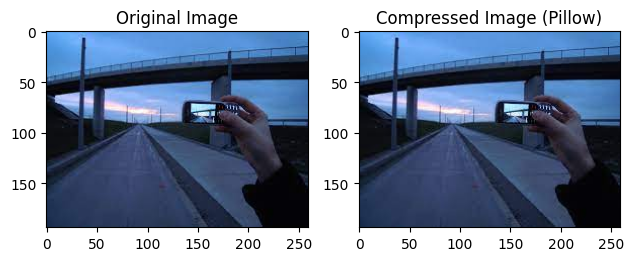

In [ ]:
#Q5
#compressing image using pillow
image_path = 'clean.jpeg'
img = Image.open(image_path)
compressed_image_path_pillow = 'pillow.jpg'
img.save(compressed_image_path_pillow, quality=85)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

compressed_img_pillow = Image.open(compressed_image_path_pillow)
plt.subplot(1, 2, 2)
plt.imshow(compressed_img_pillow)
plt.title('Compressed Image (Pillow)')
plt.tight_layout()
plt.show()


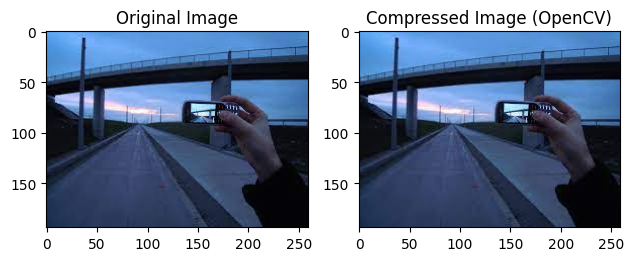

In [ ]:
#Compressing image using open cv
image_path = 'clean.jpeg'
img = cv2.imread(image_path)
compressed_image_path_opencv = 'cv.jpg'
cv2.imwrite(compressed_image_path_opencv, img, [int(cv2.IMWRITE_JPEG_QUALITY), 85])  # Adjust the quality
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

compressed_img_opencv = cv2.imread(compressed_image_path_opencv)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(compressed_img_opencv, cv2.COLOR_BGR2RGB))
plt.title('Compressed Image (OpenCV)')
plt.tight_layout()
plt.show()

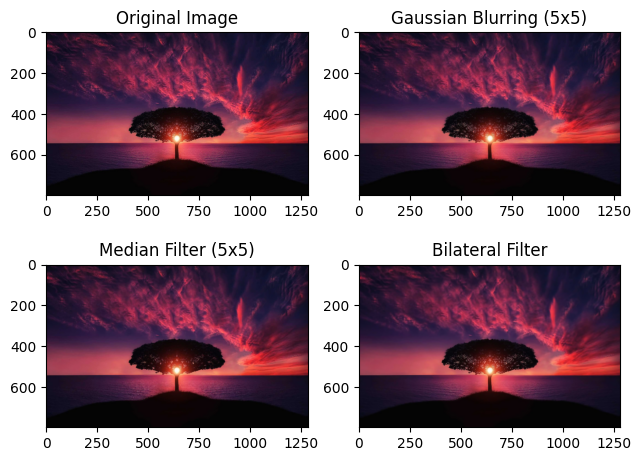

In [ ]:
#Q6
image_path = 'image.jpg'
img = cv2.imread(image_path)
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Gaussian Blurring Filter
gaussian_blur = cv2.GaussianBlur(img, (5, 5), 0)
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Blurring (5x5)')

# Median Filter
median_filtered = cv2.medianBlur(img, 5)
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB))
plt.title('Median Filter (5x5)')

# Bilateral Filter
bilateral_filtered = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(bilateral_filtered, cv2.COLOR_BGR2RGB))
plt.title('Bilateral Filter') # Bilateral Filter for diameter = 9, color = 75, space = 75
plt.tight_layout()
plt.show()